In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk as nltk # Natural language Toolkit
import matplotlib.pyplot as plt 
import seaborn as sns #For making visualizations
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordclouds

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from PIL import Image # For saving images

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tefkc-responses/Viksit Bharat  Tefkc (Responses).xlsx
/kaggle/input/maskscloud/pic2.png
/kaggle/input/maskscloud/pic1.png
/kaggle/input/indiaphoto/Untitled design (1).png
/kaggle/input/pls-work-peacock/newmaskimages.png
/kaggle/input/viksit-bharat-form-responses/Viksit-Bharat Form Responses.xlsx


# About 
The Viksit Bharat - International Economics Summit is a formal event organized by HSNC University. The event consists of speaker sessions and panel discussions. We were also tasked with conducting a research on student's perspectives on the topic "Viksit Bharat @2047".

HSNC University collected 682 responses from its students, alternatively the student committee (TEFKC) has collected  274 responses with another set of questions.
 
The following analysis is an attempt to summarize the results from both parties via visualizations.

# Form 1: Data collected by TEFKC (The Economic Forum of KC College)

In [2]:
#Importing and seeing the raw data
filepath = '/kaggle/input/tefkc-responses/Viksit Bharat  Tefkc (Responses).xlsx'
df = pd.read_excel(filepath)
df.head()

,Student,Do you see India as an Economic superpower in 2047?,What sector does India need to work on to become a superpower in 2047?,Why do you think the chosen sector needs improvement?,How can students contribute to making India a superpower in 2047?,What role could you play towards India's development?,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,Yes,"Infrastructure, Education",India’s infrastructure does not match the leve...,With better education and improvement in job p...,A supporting role,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Yes,"Education, Health Services",Health services are not good specially for slu...,Use their brains and think of ways to work in ...,Providing basic education to slum areas.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Yes,"Infrastructure, Health Services",Because it'll lead to more foreign policies an...,By helping in industrial area in an environmen...,Being a responsible citizen,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Yes,"Education, Health Services, Agriculture",I think agriculture sector has to be taken int...,By not being unemployed,Na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Yes,"Education, Health Services",Education is the only way to make India more s...,Students are the most resourceful person as th...,India's development mostly include the upliftm...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Setting the index and removing null columns
df.set_index('Student ', drop = True, inplace = True)
df = df.dropna(axis = 1).astype('string')

#Renaming the questions to make the code look simpler
df1 = df.rename(columns = {'Do you see India as an Economic superpower in 2047?':'q1','What sector does India need to work on to become a superpower in 2047?':'q2','Why do you think the chosen sector needs improvement?':'q3','How can students contribute to making India a superpower in 2047?':'q4',"What role could you play towards India's development?":"q5"})
df1.head()

,q1,q2,q3,q4,q5
Student,,,,,
1,Yes,"Infrastructure, Education",India’s infrastructure does not match the leve...,With better education and improvement in job p...,A supporting role
2,Yes,"Education, Health Services",Health services are not good specially for slu...,Use their brains and think of ways to work in ...,Providing basic education to slum areas.
3,Yes,"Infrastructure, Health Services",Because it'll lead to more foreign policies an...,By helping in industrial area in an environmen...,Being a responsible citizen
4,Yes,"Education, Health Services, Agriculture",I think agriculture sector has to be taken int...,By not being unemployed,Na
5,Yes,"Education, Health Services",Education is the only way to make India more s...,Students are the most resourceful person as th...,India's development mostly include the upliftm...


For the second question, we can simply plot a frequency distribution. NLTK library is used after concatenating all the responses.
(Question 1 is ignored since its visualization was simply made in excel)

In [4]:
#Concatenate all responses into one string
words = df1['q2'].str.cat(sep =' ')

#Tokenization
from nltk import word_tokenize
tokens = word_tokenize(words)

In [5]:
from nltk.probability import FreqDist
fd = FreqDist(tokens)

# **1) What sector does India need to work on to become a superpower in 2047?**

In [6]:
#Representing the frequencies of the most common selected industries as a dataframe
data = pd.DataFrame(fd.most_common(7))
data = data.drop(0, axis=0)
data = data.rename(columns = {0:"Sector",1:"Frequency"})
data

,Sector,Frequency
1,Education,203
2,Infrastructure,147
3,Health,124
4,Services,124
5,Agriculture,95
6,Commerce,74


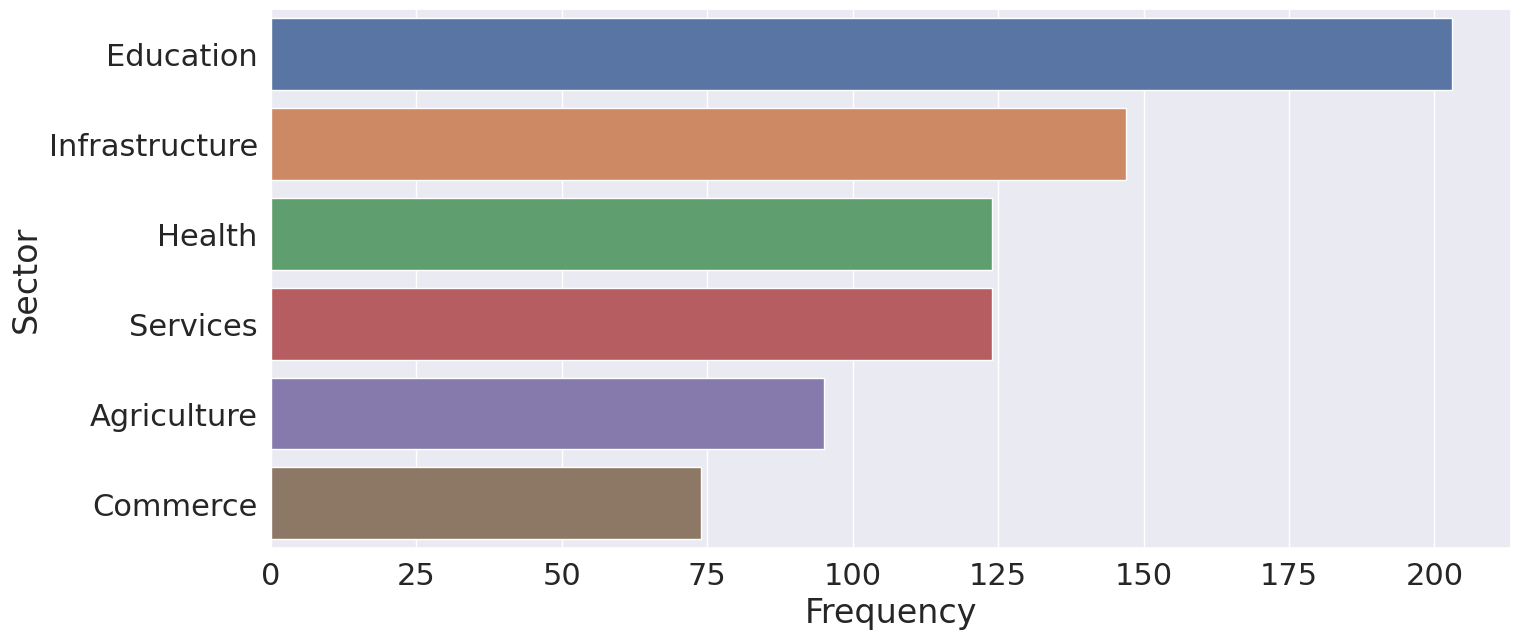

In [7]:
#Plotting the results in a barplot
plt.figure(figsize = (16,7),)
sns.set(font = 'Poppins',font_scale = 2)
sns.barplot(data, x = data.iloc[:,1], y = data.iloc[:,0],)

#The following line can be uncommented to save the figure as a png
#plt.savefig('NewGraph.png',dpi = 500, transparent = True)
plt.show()

Education, Infrastructure and Healthcare were the most common responses

# 2) Why do you think the chosen sector needs improvement?

The main idea is to summarize the rest of the responses is to create a wordcloud that shows the most frequent words in the text that were repeated. This gives us a simple snapshot of what words/phrases are frequent among responses 

In [8]:
#Remove stopwords to filter out words such as and, the, if, punctuation marks, etc. 
from nltk.corpus import stopwords

#Wordcloud library and nltk have a different set of stopwords, Take a union of these two to get as many stopwords from the 2 libraries
sw = set(stopwords.words('english'))
a = sw.union(set(STOPWORDS))

In [9]:
#Define a function to return the text without stopwords
def remove_stopwords(text):
    no_stopwords = [word.capitalize() for word in text if word not in a and word.isalpha() == True]
    return no_stopwords

In [10]:
#Concatenate the text
text = df1['q3'].str.cat(sep =' ')

#Remove unwanted characters from text
clean_text = text.replace('\n',' ')
clean_text = clean_text.replace('\\','')

#Tokenization 
tokens2 = word_tokenize(clean_text)
tokens2 = remove_stopwords(tokens2)
fd2 = FreqDist(tokens2)
data = fd2.most_common(10)
data

[('Education', 93),
 ('India', 73),
 ('Infrastructure', 45),
 ('Needs', 43),
 ('Because', 39),
 ('Sector', 35),
 ('Need', 32),
 ('Country', 30),
 ('Development', 30),
 ('Health', 21)]

**The results are consistent with the previous question**

Since there is a large variety of different ideas that appear in the responses, frequencies do not give us the best idea of why the chosen sector needs improvement.
However, we can find the most important phrases in the responses by PMI (Point-wise Mutual Information) - A statistic that is used to measure how much information can be extraced by a phrase of words.

In [11]:
#Importing measures for NLTK
from nltk.collocations import *

#Bigrams are phrases containing 2 words, Trigrams are phrases with 3 words
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#Create a finder object and print the 10 best trirams/Bigrams
finder1 = BigramCollocationFinder.from_words(tokens2)
finder2 = TrigramCollocationFinder.from_words(tokens2)

print('10 Best Bigrams: \n\n{}'.format(finder1.nbest(bigram_measures.pmi, 10))) 
print('\n10 Best Trigrams: \n\n{}'.format(finder2.nbest(trigram_measures.pmi, 10))) 

10 Best Bigrams: 

[('Achieve', 'Goal'), ('Active', 'Contributor'), ('Activity', 'Appropriate'), ('Adequately', 'Advanced'), ('Advancing', 'Steady'), ('Agenda', 'Books'), ('Allows', 'Student'), ('Alot', 'Accidents'), ('Appropriate', 'Perks'), ('Artificial', 'Intelligence')]

10 Best Trigrams: 

[('Activity', 'Appropriate', 'Perks'), ('Agenda', 'Books', 'Actually'), ('Allows', 'Student', 'Indulge'), ('Barriers', 'Facilitating', 'Movement'), ('Bcoz', 'Per', 'Views'), ('Break', 'Physical', 'Logistical'), ('Britishers', 'Laid', 'Discarded'), ('Carry', 'Process', 'Smoothly'), ('Communication', 'Technologies', 'Trainer'), ('Compelling', 'Case', 'Transformative')]


**Wordclouds to visualize the results:**

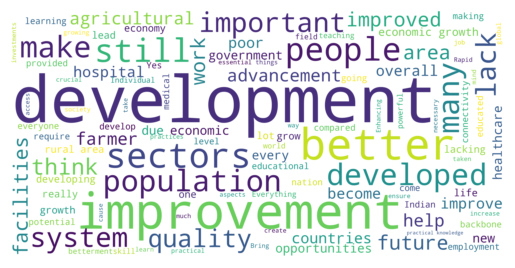

In [12]:
#Unwanted words can be manually removed
remove_words = ['India','need','needs','good','sector','education','infrastructure','agriculture','health','services','commerce','student','students','country','superpower','contribute',]

#Create and Customize the WordCloud
wordcloud = WordCloud(background_color = 'white', stopwords = a.union(remove_words), scale = 10, relative_scaling = 1).generate(clean_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3) How can student contribute to making India a superpower in 2047?

In [13]:
#Preprocess text
text = df1['q4'].str.cat(sep =' ')
clean_text = text.replace('\n','')
tokens = word_tokenize(clean_text)

#Removal of Stopwords
newtokens = remove_stopwords(tokens)

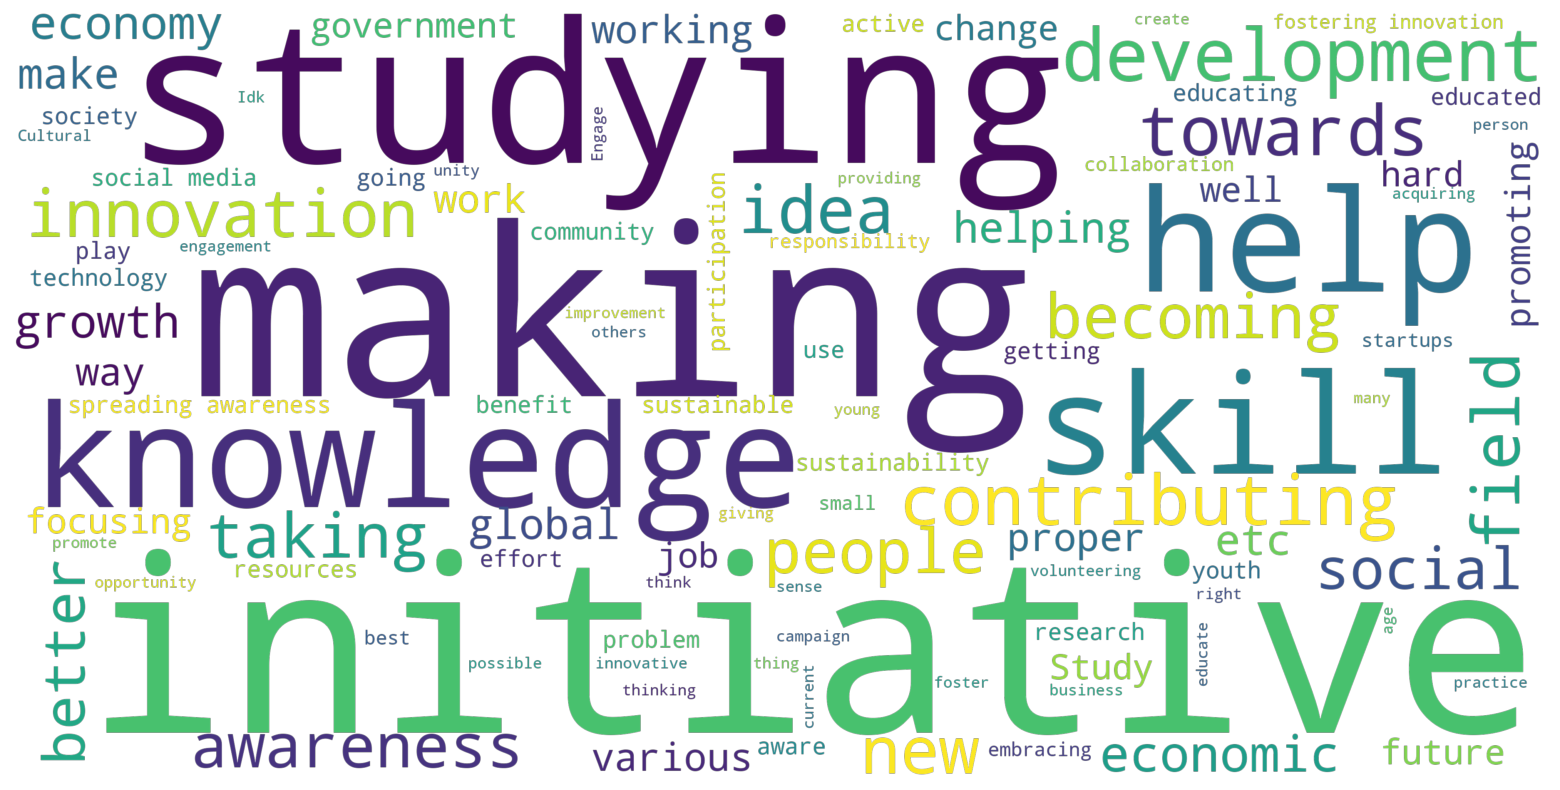

In [14]:
remove_words = ['India','need','needs','good','sector','education','infrastructure','agriculture','health','services','commerce','student','students','country','superpower','contribute','nation']
wordcloud = WordCloud(background_color = None, stopwords = a.union(set(remove_words)), mode = 'RGBA',scale = 10, relative_scaling = 0.5, max_words = 100).generate(clean_text)

# Display the generated image:
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Question3.png', dpi = 1000, transparent = True)
plt.show()

# 4) What role could you play towards India's development?

In [15]:
txt3 = df1['q5'].str.cat(sep =' ') #Concatenation

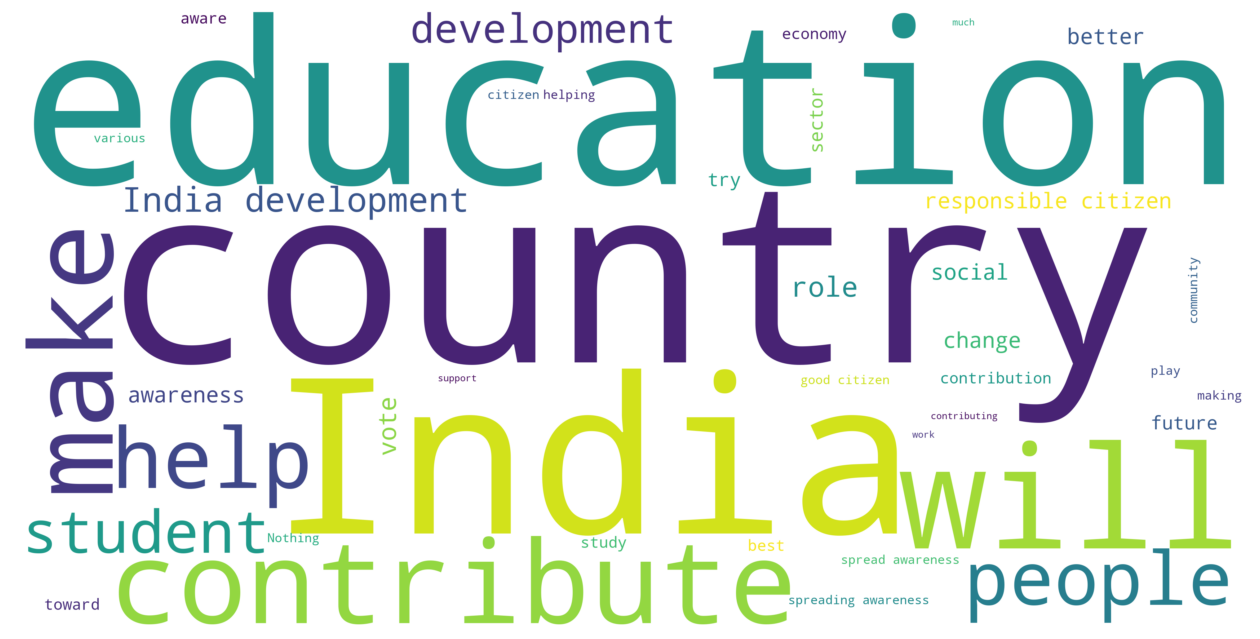

In [16]:
wordcloud = WordCloud(background_color = 'white', scale = 10, relative_scaling = 1, min_font_size = 3, max_words = 1000).generate(txt3)

# Display the generated image:
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Form 2: Data collected by HSNC University

In [17]:
#Import the data
df2 = pd.read_excel('/kaggle/input/viksit-bharat-form-responses/Viksit-Bharat Form Responses.xlsx')
df2.set_index(keys = 'Student ', drop = True, inplace = True)
df2.head()

,Admitted to,Student of,Program Admitted to,How should a Viksit Bharat look like in 2047?,What do we need to do to reach this goal?,What can you do to make Viksit Bharat @2047 possible?,What do the students want from India@2047?\nHow they want to benefit?
Student,,,,,,,
1,H.R. College,Third Year,B.Com.,Main aim of Viksit Bharat should be to ensure ...,Should also focus on upper middle class people...,Work for betterment of society,Better education system
2,H.R. College,Third Year,B.Com.,An accepting society :),Sensitisation Programs for Marginalised Commun...,Foster Harmony amongst communities,Better and more inclusive job opportunities
3,H.R. College,Second Year,B.Com.,"SPORTS SHOULD BE MORE DEVELOPED,MORE ENCOURAGE...",ENCOURAGEMENT FOR SPORTS;BETTER HEALTHCARE FAC...,I CAN LEARN NEW SPORTS AND ENCOURAGE OTHERS TO...,BETTER SPORTS OPPORTUNITIES FOR ALL STUDENTS;E...
4,H.R. College,Second Year,B.Com.,The well educated Bharat,Help each other,To help each other with good education,To make education in easy way
5,H.R. College,First Year,B.Com.,It should be the most developed country in ter...,"Establish, maintain and follow rules and regul...","Maintain Clean Surroundings, Respect all the w...",Spread Education country-wide.\nThe future of ...


In [18]:
cols_to_drop = ['Admitted to', 'Student of','Program Admitted to']
df2.drop(cols_to_drop, axis = 1, inplace = True)
df2.rename(columns = {"How should a Viksit Bharat look like in 2047?":"Q1", "What do we need to do to reach this goal?":"Q2", "What can you do to make Viksit Bharat @2047 possible?": "Q3", "What do the students want from India@2047?\nHow they want to benefit?":"Q4"}, inplace = True)
df2.head()

,Q1,Q2,Q3,Q4
Student,,,,
1,Main aim of Viksit Bharat should be to ensure ...,Should also focus on upper middle class people...,Work for betterment of society,Better education system
2,An accepting society :),Sensitisation Programs for Marginalised Commun...,Foster Harmony amongst communities,Better and more inclusive job opportunities
3,"SPORTS SHOULD BE MORE DEVELOPED,MORE ENCOURAGE...",ENCOURAGEMENT FOR SPORTS;BETTER HEALTHCARE FAC...,I CAN LEARN NEW SPORTS AND ENCOURAGE OTHERS TO...,BETTER SPORTS OPPORTUNITIES FOR ALL STUDENTS;E...
4,The well educated Bharat,Help each other,To help each other with good education,To make education in easy way
5,It should be the most developed country in ter...,"Establish, maintain and follow rules and regul...","Maintain Clean Surroundings, Respect all the w...",Spread Education country-wide.\nThe future of ...


# 1) How should a Viksit Bharat look like in 2047?

In [19]:
#Preprocessing steps
q1 = df2['Q1'].str.cat(sep = ' ')
q1 = q1.replace('\n', ' ')
tokens = word_tokenize(q1)
new_tokens = remove_stopwords(tokens)

#Frequency distribution
fd = FreqDist(new_tokens)
fd.most_common(20)

[('Bharat', 378),
 ('India', 378),
 ('Education', 327),
 ('Viksit', 296),
 ('A', 201),
 ('Developed', 185),
 ('Development', 185),
 ('Global', 163),
 ('Sustainable', 163),
 ('Country', 160),
 ('Nation', 159),
 ('The', 154),
 ('In', 152),
 ('Healthcare', 146),
 ('Economy', 145),
 ('Infrastructure', 143),
 ('Social', 136),
 ('Technology', 127),
 ('Society', 125),
 ('Energy', 120)]

# Image masking
We can add a mask over the wordcloud to wrap it in a custom image

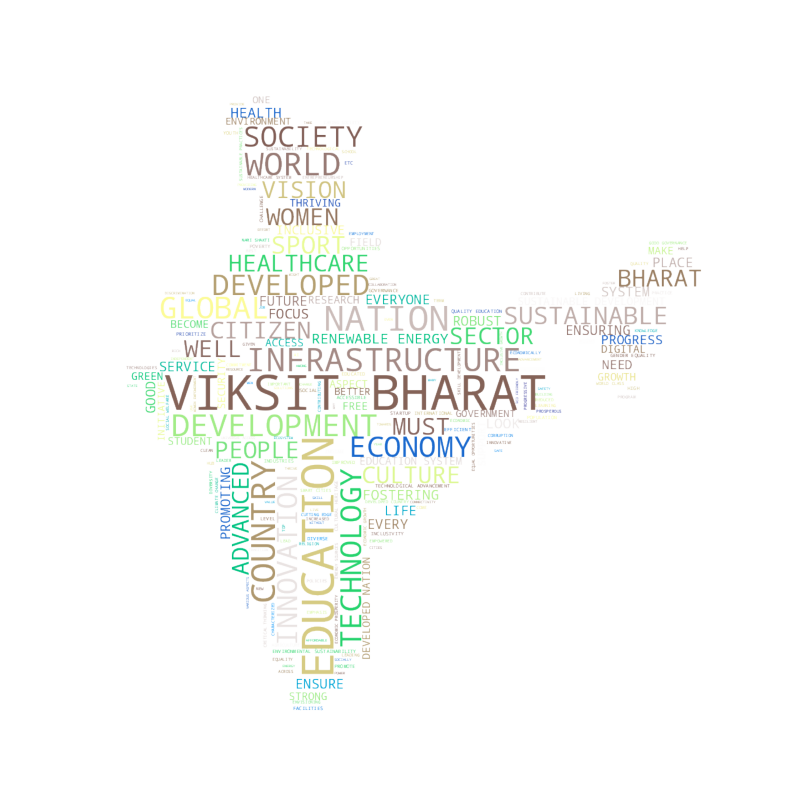

In [20]:
remove_words = set(['India','will','Viksit Bharat','Viksit  Bharat'])
imgmask = np.array(Image.open('/kaggle/input/indiaphoto/Untitled design (1).png'))
cmap = 'terrain'
wc = WordCloud(background_color = "rgba(255, 255, 255, 0)", mode = "RGBA",colormap = cmap, stopwords = remove_words.union(STOPWORDS), mask = imgmask, relative_scaling = 0.5,max_words = 800, min_font_size = 5).generate(q1.upper())

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('map.png', dpi = 1500, transparent = True)
plt.show()

# 2) What do we need to do to reach this goal?

In [21]:
q2 = df2['Q2'].str.cat(sep = ' ')
q2 = q2.replace('\n', ' ')
q2[0:100]

'Should also focus on upper middle class people and not only on people below poverty line/ rich peopl'

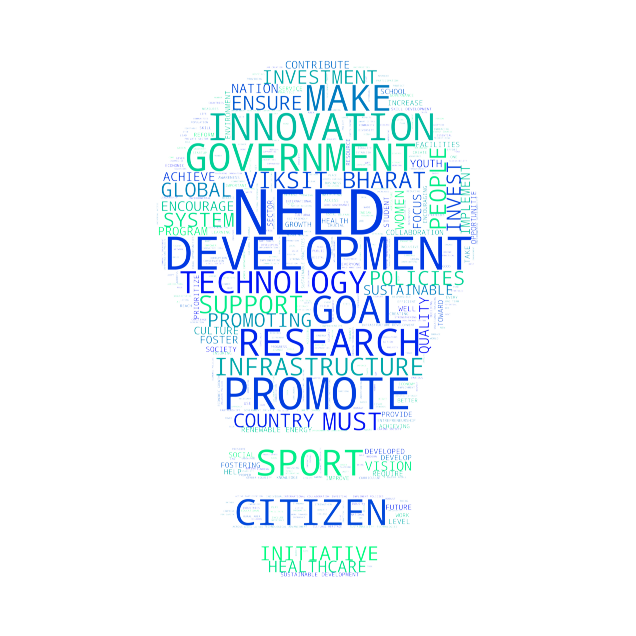

In [22]:
bulbmask = np.array(Image.open('/kaggle/input/maskscloud/pic2.png'))
words_to_remove = set(['India','education']).union(remove_words)
cmap = 'winter_r'
wc = WordCloud(background_color = "rgba(255, 255, 255, 0)", mode = "RGBA",colormap = cmap, stopwords = a.union(words_to_remove), scale = 10, relative_scaling = 0.5,mask = bulbmask, max_words = 800, min_font_size = 3).generate(q2.upper())

# Display the generated image:
#wc.recolor(color_func = colormap)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('newbulb.png', dpi = 1700, transparent = True)
plt.show()

# 3) What can you do to make Viksit Bharat @2047 possible?

In [23]:
q3 = df2['Q3'].str.cat(sep = ' ')
q3 = q3.replace('\n', ' ')
q3 = q3 + txt3 #Since the question 4 of the previous form is essentially the same question, combine the responses
q3 = q3.upper() #The wordcloud just looked better in uppercase but this step is not required

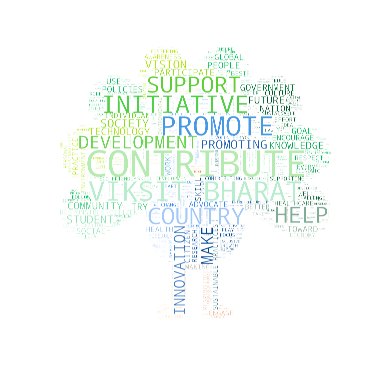

In [24]:
pckmask = np.array(Image.open('/kaggle/input/pls-work-peacock/newmaskimages.png'))
colormap = ImageColorGenerator(pckmask)
remove_words = set(['education','VIKSIT BHARAT','will','India','Viksit  Bharat','viksit bharat'])
wc = WordCloud(background_color = "rgba(255, 255, 255, 0)", mode = "RGBA", stopwords = a.union(remove_words),scale = 10, mask = pckmask, relative_scaling = 1, max_words = 1000, min_font_size = 3).generate(q3)

# Display the generated image:
wc.recolor(color_func = colormap)
#plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('PEACOCK.png', dpi = 2000, transparent = True)
plt.show()

# 4) What do the students want from India@2047? How they want to benefit?

In [25]:
q4 = df2['Q4'].str.cat(sep = ' ')
q4 = q4.replace('\n', ' ')

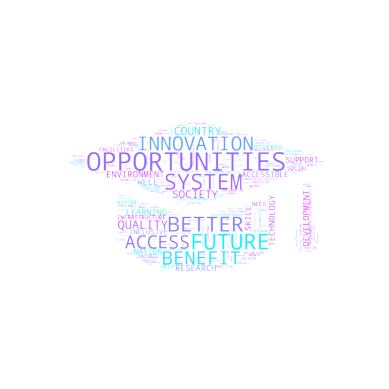

In [26]:
imgmask = np.array(Image.open('/kaggle/input/maskscloud/pic1.png'))
cmap = 'cool'
remove_words = set(['student','students','want','India','education'])
wc = WordCloud(background_color = "rgba(255, 255, 255, 0)", mode = "RGBA",colormap= cmap, relative_scaling = 0.5,stopwords = remove_words.union(a), mask = imgmask, max_words = 800, min_font_size = 5).generate(q4.upper())

# Display the generated image:
#wc.recolor(color_func = colormap)
#plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('newnewhat.png', dpi = 2000, transparent = True, format = 'png')
plt.show()

# Conclusion

Education and Infrastructure tend to be the most common responses when it comes to sectors that the students would like to see improved. 


Wordclouds can provide us with an easy snapshot of the responses for both datasets. Analysis of text data can be quite challenging especially when the raw data isn't clean.
Despite all this, the different NLP libraries saved a huge amount of valuable time for the committee.

The student committee was originally assigned to manually analyze the data and subjectively pick out responses that they considered interesting. Thanks to the python libraries used above, the analysis was done within a day and did not require any manual tasks.